<a href="https://colab.research.google.com/github/Uberwald/Analytics/blob/main/5_6_%D0%94%D0%BE%D0%B2%D0%B5%D1%80%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5_%D0%B8%D0%BD%D1%82%D0%B5%D1%80%D0%B2%D0%B0%D0%BB%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier #машинное обучение, дерево решений
from sklearn.metrics import accuracy_score
%matplotlib inline

In [ ]:
#загрузка датасета
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv')
data.head() 
#Последняя колонка - целевая переменная

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [ ]:
values = data.values

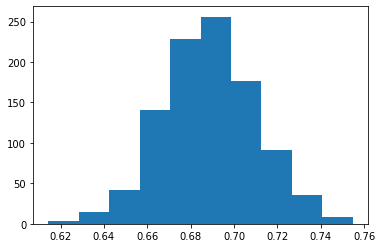

95.0 64.50131251726997 73.21995394214616


In [ ]:
#bootstrap
n_iterations = 1000
n_size = int(len(data)*0.5)

#запуск алгоритма bootstrap
stats = []
#в каждом цикле будем обучать модель получать какой-то результат точности прогноза
#создадим тестовую выборку
for i in range(n_iterations):
  train = resample(values, n_samples = n_size)
  test = np.array([x for x in values if x.tolist() not in train.tolist()])
  #обучим модель
  model = DecisionTreeClassifier()
  model.fit(train[:,:-1], train[:, -1])
  #делаем прогноз значений
  predict = model.predict(test[:,:-1])
  score = accuracy_score(test[:,-1], predict)
  stats.append(score)

#гистограмма нашей точности
plt.hist(stats)
plt.show()

#Доверительный интервал
alpha = 0.95
p = ((1-alpha)/2)*100
lower = max(0.0, np.percentile(stats, p))

p = (alpha + ((1-alpha)/2))*100
upper = min(1, np.percentile(stats, p))

print(alpha*100, lower*100, upper*100)